In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.metrics import  ConfusionMatrixDisplay, f1_score, classification_report, roc_curve
import seaborn as sns

1. Classifying Loan Status Using Decision Trees

In [6]:
club_data=pd.read_csv("LendingClubLoan.csv")
club_data.head()

,Unnamed: 0,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,1,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,2,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,3,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,4,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,5,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [4]:
club_data.shape

(10000, 56)

In [5]:
print('Missing values:')
print(club_data.isnull().sum())

Missing values:
Unnamed: 0                             0
emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0


In [6]:
club_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        10000 non-null  int64  
 1   emp_title                         9167 non-null   object 
 2   emp_length                        9183 non-null   float64
 3   state                             10000 non-null  object 
 4   homeownership                     10000 non-null  object 
 5   annual_income                     10000 non-null  float64
 6   verified_income                   10000 non-null  object 
 7   debt_to_income                    9976 non-null   float64
 8   annual_income_joint               1495 non-null   float64
 9   verification_income_joint         1455 non-null   object 
 10  debt_to_income_joint              1495 non-null   float64
 11  delinq_2y                         10000 non-null  int64  
 12  month

In [7]:
# Drop these columns because it has large amount of missing values.
club_data.drop(['annual_income_joint', 'verification_income_joint', 'debt_to_income_joint', 'months_since_last_delinq', 'months_since_90d_late','Unnamed: 0'], axis=1, inplace=True)

In [8]:
# Identify numerical columns with missing values
numerical_columns = club_data.select_dtypes(include=['float64', 'int64']).columns

# Fill missing values in numerical columns with the mean
for col in numerical_columns:
    if club_data[col].isnull().sum() > 0:  # Check if there are missing values
        mean_value = club_data[col].mean()
        club_data[col].fillna(mean_value, inplace=True)

In [9]:
# Fill missing values in 'emp_title' with the mode
mode_emp_title = club_data['emp_title'].mode()[0]
club_data['emp_title'].fillna(mode_emp_title, inplace=True)

In [10]:
club_data.isnull().sum()

emp_title                           0
emp_length                          0
state                               0
homeownership                       0
annual_income                       0
verified_income                     0
debt_to_income                      0
delinq_2y                           0
earliest_credit_line                0
inquiries_last_12m                  0
total_credit_lines                  0
open_credit_lines                   0
total_credit_limit                  0
total_credit_utilized               0
num_collections_last_12m            0
num_historical_failed_to_pay        0
current_accounts_delinq             0
total_collection_amount_ever        0
current_installment_accounts        0
accounts_opened_24m                 0
months_since_last_credit_inquiry    0
num_satisfactory_accounts           0
num_accounts_120d_past_due          0
num_accounts_30d_past_due           0
num_active_debit_accounts           0
total_debit_limit                   0
num_total_cc

In [11]:
# Identify numerical and categorical columns
numerical_columns = club_data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = club_data.select_dtypes(include=['object']).columns

In [12]:
# Apply Label Encoding to categorical features
encoder = LabelEncoder()
for feature in categorical_columns:
    club_data[feature] = encoder.fit_transform(club_data[feature])  # Ensure all values are strings

In [13]:
# Standardize numerical features
scaler = StandardScaler()
club_data[numerical_columns] = scaler.fit_transform(club_data[numerical_columns])

In [16]:
# Split the data into training and test sets
X = club_data.drop(columns=['loan_status'])
y = club_data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  

# Calculate accuracy and ROC AUC
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)  

# Print results
print(f'Accuracy: {accuracy:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

Accuracy: 0.97


2.  Predicting Hospital Readmission Using Logistic Regression

In [52]:
hospital_data=pd.read_csv("HospitalReadmissions.csv")
hospital_data.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [53]:
hospital_data.isnull().sum()

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

In [54]:
# target column
target = 'readmitted'

# Encode the target labels as 0 and 1
hospital_data[target] = hospital_data[target].apply(lambda x: 1 if x == 'yes' else 0)

# Separate features and target variable
X = hospital_data.drop(columns=[target])
y = hospital_data[target]

In [55]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

# One-hot encode categorical variables
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded_categorical = encoder.fit_transform(X[categorical_cols])
encoded_categorical_df = pd.DataFrame(X_encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))

# Standardize numerical features
scaler = StandardScaler()
X_scaled_numerical = scaler.fit_transform(X[numerical_cols])
scaled_numerical_df = pd.DataFrame(X_scaled_numerical, columns=numerical_cols)

# Combine encoded categorical and scaled numerical features
X_preprocessed = pd.concat([scaled_numerical_df.reset_index(drop=True), encoded_categorical_df.reset_index(drop=True)], axis=1)

In [56]:
# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [57]:
# Evaluate the model
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print(classification_report(y_test, y_pred))

Precision: 0.63
Recall: 0.41
F1-score: 0.50
              precision    recall  f1-score   support

           0       0.60      0.78      0.68      2658
           1       0.63      0.41      0.50      2342

    accuracy                           0.61      5000
   macro avg       0.61      0.60      0.59      5000
weighted avg       0.61      0.61      0.60      5000



3. Classifying Digit Images Using Decision Trees

In [8]:
mnist_test=pd.read_csv("mnist_test.csv")
mnist_train=pd.read_csv("mnist_train.csv")
mnist_test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
mnist_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
print('Train Dataset:',mnist_train.shape)
print('Test Dataset:',mnist_test.shape)

Train Dataset: (60000, 785)
Test Dataset: (10000, 785)


In [11]:
mnist_train.isnull().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [12]:
mnist_test.isnull().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

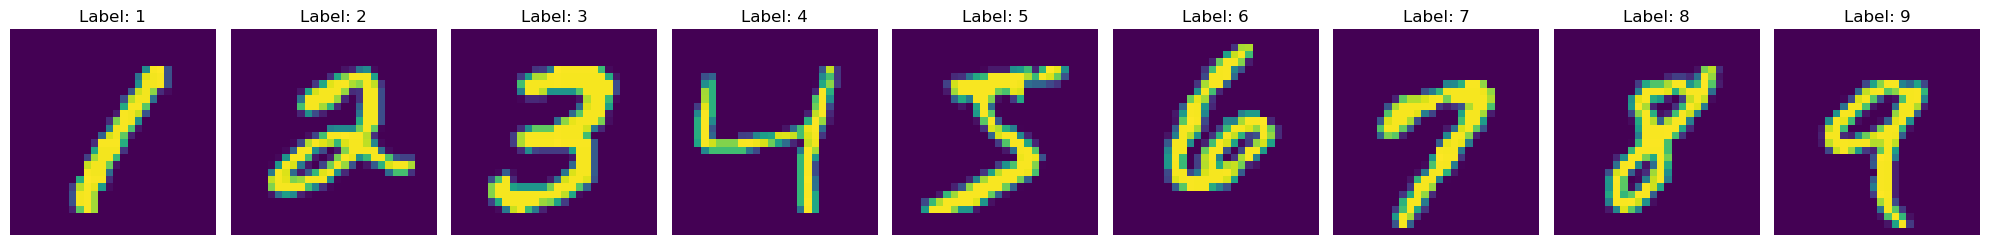

In [13]:
total_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# Filter the dataframe to find the first occurrence of each specified label
filtered_df = mnist_train[mnist_train['label'].isin(total_labels)]
indexes = filtered_df.groupby('label').apply(lambda x: x.index[0]).tolist()

# Plot the images corresponding to the labels
fig, axes = plt.subplots(1, len(indexes), figsize=(20, 5))
for i, index in enumerate(indexes):
    image = mnist_train.iloc[index, 1:].values.reshape(28, 28)
    axes[i].imshow(image, cmap='viridis')
    axes[i].set_title(f'Label: {mnist_train.iloc[index]["label"]}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [54]:
# Separate features and target variable
X_train = mnist_train.drop('label', axis=1)  
y_train = mnist_train['label']

X_test = mnist_test.drop('label', axis=1)
y_test = mnist_test['label']

In [55]:
# Normalize pixel values to the range [0, 1] 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
# Initialize and train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.88
Confusion Matrix:
[[ 914    1    7    4    6    9   16    5    8   10]
 [   0 1084    9    8    2    9    5    3   14    1]
 [  13   11  887   29   15    6    9   24   30    8]
 [   7    8   34  861    8   40    3    6   17   26]
 [   8    4   11    6  858    5   18   10   20   42]
 [  15    8    5   39    6  740   25    6   32   16]
 [  21    5   11    9   23   15  846    3   20    5]
 [   2    7   21   24   12    5    3  925    9   20]
 [   8    9   33   34   21   32   14   12  785   26]
 [  14    5   10   22   45   10    6   20   23  854]]


4. Predicting Loan Approval Using Logistic Regression

In [3]:
loan_data=pd.read_csv("Loan.csv")
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_data.shape

(614, 13)

In [5]:
loan_data['Loan_Status'] = loan_data['Loan_Status'].map({'Y': 1, 'N': 0})
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [6]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [8]:
# Fill missing values for numerical variables with mean
numerical_features = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for feature in numerical_features:
    loan_data[feature].fillna(loan_data[feature].mean(), inplace=True)

# Fill missing values for categorical variables with mode
categorical_features = ['Gender', 'Married', 'Dependents', 'Self_Employed']
for feature in categorical_features:
    loan_data[feature].fillna(loan_data[feature].mode()[0], inplace=True)

# Drop the Loan_ID column
loan_data.drop(columns=['Loan_ID'], inplace=True)

In [9]:
loan_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [24]:
categorical_features = loan_data.select_dtypes(include=['object']).columns
numerical_features = loan_data.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
# Apply Label Encoder to categorical features
encoder = LabelEncoder()
for feature in categorical_features:
    loan_data[feature] = encoder.fit_transform(loan_data[feature])

# Apply Standard Scaler to numerical features
scaler = StandardScaler()
for feature in numerical_features:
    loan_data[numerical_features] = scaler.fit_transform(loan_data[numerical_features])

In [28]:
# Separate features and target
X = loan_data.drop(columns=['Loan_Status'])
y = loan_data['Loan_Status'].values  

In [32]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.79
Confusion Matrix:
[[18 25]
 [ 1 79]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



5. Classifying Wine Quality Using Decision Trees

In [3]:
wine_data=pd.read_csv("WineQuality.csv")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_data.shape

(1599, 12)

In [5]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
# Separate features and target
X = wine_data.drop(columns=['quality'])
y = wine_data['quality']

In [16]:
# Convert quality to binary target variable
y = wine_data['quality'].apply(lambda x: 1 if x > 5 else 0)

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

print(class_report)

Accuracy: 0.74
ROC AUC: 0.74
Confusion Matrix:
[[102  39]
 [ 45 134]]
              precision    recall  f1-score   support

           0       0.69      0.72      0.71       141
           1       0.77      0.75      0.76       179

    accuracy                           0.74       320
   macro avg       0.73      0.74      0.73       320
weighted avg       0.74      0.74      0.74       320

